<a href="https://colab.research.google.com/github/girinath18/CodeFormer/blob/second/face_enhanacement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.display import clear_output
%cd /content
!rm -rf /content/CodeFormer
!git clone https://github.com/sczhou/CodeFormer.git
%cd /content/CodeFormer
!pip install -r /content/CodeFormer/requirements.txt
# Install basicsr
!python /content/CodeFormer/basicsr/setup.py develop
# Download the pre-trained model
!python /content/CodeFormer/scripts/download_pretrained_models.py facelib
!python /content/CodeFormer/scripts/download_pretrained_models.py CodeFormer
clear_output()

In [2]:
from google.colab import drive
import os
drive.mount("/content/gdrive", force_remount=True)
drive_input_folder = "/content/gdrive/MyDrive/upload"
if os.path.exists(drive_input_folder):
    print("The folder exists.")
else:
    os.mkdir(drive_input_folder)
    print(f"Creating {drive_input_folder} folder")

Mounted at /content/gdrive
Creating /content/gdrive/MyDrive/upload folder


In [ ]:
#@title Utils { display-mode: "form" }


# Visualization function
import cv2
import matplotlib.pyplot as plt
import os
import shutil
def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1)
  plt.title('Input', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('CodeFormer', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)
def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

upload_folder = ('/content/input')
if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
os.mkdir(upload_folder)
if os.path.exists("/content/output"):
  shutil.rmtree("/content/output")
clear_output()

In [3]:
from PIL import Image
import os
import shutil
from google.colab import drive
import os
from google.colab import files
keep_images = False
upload_folder = ('/content/input')
%cd /content/CodeFormer

if keep_images:
  pass
else:
  if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
  os.mkdir(upload_folder)


def image_from_drive():
  drive.mount('/content/gdrive',force_remount=True)
  drive_input_folder = "/content/input"
  if os.path.exists(drive_input_folder):
      print("The folder exists.")
  else:
      os.mkdir(drive_input_folder)
  image_extensions = ['.jpg', '.jpeg', '.png']
  for filename in os.listdir(drive_input_folder):
    _, extension = os.path.splitext(filename)
    if extension.lower() in image_extensions:
      drive_image_path=os.path.join(drive_input_folder,filename)
      shutil.copy(drive_image_path,upload_folder)
def image_from_device():
  uploaded = files.upload()
  for filename in uploaded.keys():
    dst_path = os.path.join(upload_folder, filename)
    print(f'move {filename} to {dst_path}')
    shutil.move(filename, dst_path)

upload_from = "local device"
if upload_from == "google drive":
  image_from_drive()
if upload_from == "local device":
  image_from_device()
clear_output()
file_count = len(os.listdir(upload_folder))
if file_count >= 1:
    print("Run next cell")
else:
    print("Please upload an image.")


Please upload an image.


In [ ]:
# Inference the uploaded images
%cd /content/CodeFormer

CODEFORMER_FIDELITY = 0.7

BACKGROUND_ENHANCE = True

FACE_UPSAMPLE = True
if BACKGROUND_ENHANCE:
  if FACE_UPSAMPLE:
    !python inference_codeformer.py -w $CODEFORMER_FIDELITY --input_path inputs/user_upload --bg_upsampler realesrgan --face_upsample
  else:
    !python inference_codeformer.py -w $CODEFORMER_FIDELITY --input_path inputs/user_upload --bg_upsampler realesrgan
else:
  !python inference_codeformer.py -w $CODEFORMER_FIDELITY --input_path inputs/user_upload
clear_output()
print(f"All results are saved in /content/output{CODEFORMER_FIDELITY}")

All results are saved in /content/output0.7


In [ ]:

save_a_copy_in_google_drive = True
if save_a_copy_in_google_drive:
  drive.mount('/content/gdrive',force_remount=True)
  drive_save_path = '/content/gdrive/MyDrive/CodeFormer_Bulk_Upscale'
  if os.path.exists(drive_save_path):
    pass
  else:
    os.mkdir(drive_save_path)
  clear_output()
  print(f"All images/zip file save at : {drive_save_path}")

import os
import uuid
from google.colab import files
import shutil
def download_single_images():
  global CODEFORMER_FIDELITY
  download_folder = '/content/download'
  if os.path.exists(download_folder):
      os.system(f'rm -rf {download_folder}')
  os.makedirs(download_folder)
  folder_path = f"/content/CodeFormer/results/user_upload_{CODEFORMER_FIDELITY}/final_results"
  for filename in os.listdir(folder_path):
      original_path = os.path.join(folder_path, filename)
      name, extension = os.path.splitext(filename)
      random_string = str(uuid.uuid4())[:8]
      new_filename = f"{name}_{random_string}{extension}"
      download_path = f"/content/download/{new_filename}"
      if save_a_copy_in_google_drive:
        drive_path=f"{drive_save_path}/{new_filename}"
        shutil.copy(original_path, drive_path)
      shutil.copy(original_path, download_path)

      files.download(download_path)
def download_zip():
  global CODEFORMER_FIDELITY
  random_string = str(uuid.uuid4())[:5]
  zip_file_name=f"results_{random_string}.zip"
  var1=os.system(f'zip -r {zip_file_name} results/user_upload_{CODEFORMER_FIDELITY}/final_results')
  if save_a_copy_in_google_drive:
    sour=f"/content/CodeFormer/{zip_file_name}"
    dest=f"{drive_save_path}/{zip_file_name}"
    shutil.copy(sour, dest)

  files.download(zip_file_name)



folder_path = f"/content/CodeFormer/results/user_upload_{CODEFORMER_FIDELITY}/final_results"
image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp']  # Add more extensions if needed
contains_image = False
for filename in os.listdir(folder_path):
    _, extension = os.path.splitext(filename)
    if extension.lower() in image_extensions:
        contains_image = True
        break
download_format = "zip"
  if download_format == "single file":
    download_single_images()
  if download_format == "zip":
    download_zip()
else:
  print(f"The folder '{folder_path}' does not contain any image files.")


IndentationError: unexpected indent (<ipython-input-5-10595a1c01dd>, line 58)

# **maded as the single script**

In [ ]:
# Required Libraries
import os
import shutil
import cv2
import matplotlib.pyplot as plt
from google.colab import files

# Visualization Function
def display(img1, img2):
    fig = plt.figure(figsize=(25, 10))
    ax1 = fig.add_subplot(1, 2, 1)
    plt.title('Input', fontsize=16)
    ax1.axis('off')
    ax2 = fig.add_subplot(1, 2, 2)
    plt.title('CodeFormer', fontsize=16)
    ax2.axis('off')
    ax1.imshow(img1)
    ax2.imshow(img2)

def imread(img_path):
    img = cv2.imread(img_path)
    if img is None:
        raise FileNotFoundError(f"Image file not found at {img_path}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

# Paths
input_folder = '/content/input'
output_folder = '/content/output_bots'
codeformer_path = '/content/CodeFormer'

# Clean up previous runs
if os.path.isdir(input_folder):
    shutil.rmtree(input_folder)
os.mkdir(input_folder)
if os.path.exists(output_folder):
    shutil.rmtree(output_folder)
os.mkdir(output_folder)

# Image Upload
def image_from_device():
    uploaded = files.upload()
    for filename in uploaded.keys():
        dst_path = os.path.join(input_folder, filename)
        print(f'Move {filename} to {dst_path}')
        shutil.move(filename, dst_path)

# Execute Image Upload
image_from_device()
clear_output()
file_count = len(os.listdir(input_folder))
if file_count >= 1:
    print("Run next cell")
else:
    print("Please upload an image.")

# Inference the uploaded images
os.chdir(codeformer_path)

CODEFORMER_FIDELITY = 0.7
BACKGROUND_ENHANCE = True
FACE_UPSAMPLE = True

# Running the inference and saving outputs in specified output folder
command = f'python inference_codeformer.py -w {CODEFORMER_FIDELITY} --input_path {input_folder} --output_path {output_folder}'
if BACKGROUND_ENHANCE:
    command += ' --bg_upsampler realesrgan'
if FACE_UPSAMPLE:
    command += ' --face_upsample'

os.system(command)

# Debugging information to verify the output
print(f"All results are saved in {output_folder}")
output_files = os.listdir(output_folder)
print(f"Files in output folder: {output_files}")

# Check if output folder contains any images
if not output_files:
    raise FileNotFoundError(f"No output images found in {output_folder}")

# Display Results
input_image_path = os.path.join(input_folder, os.listdir(input_folder)[0])
output_image_path = os.path.join(output_folder, output_files[0])

print(f"Input image path: {input_image_path}")
print(f"Output image path: {output_image_path}")

input_image = imread(input_image_path)
output_image = imread(output_image_path)
display(input_image, output_image)


Run next cell
All results are saved in /content/output_bots
Files in output folder: ['restored_faces', 'cropped_faces', 'final_results']
Input image path: /content/input/bhuvan.jpeg
Output image path: /content/output_bots/final_results/bhuvan.png


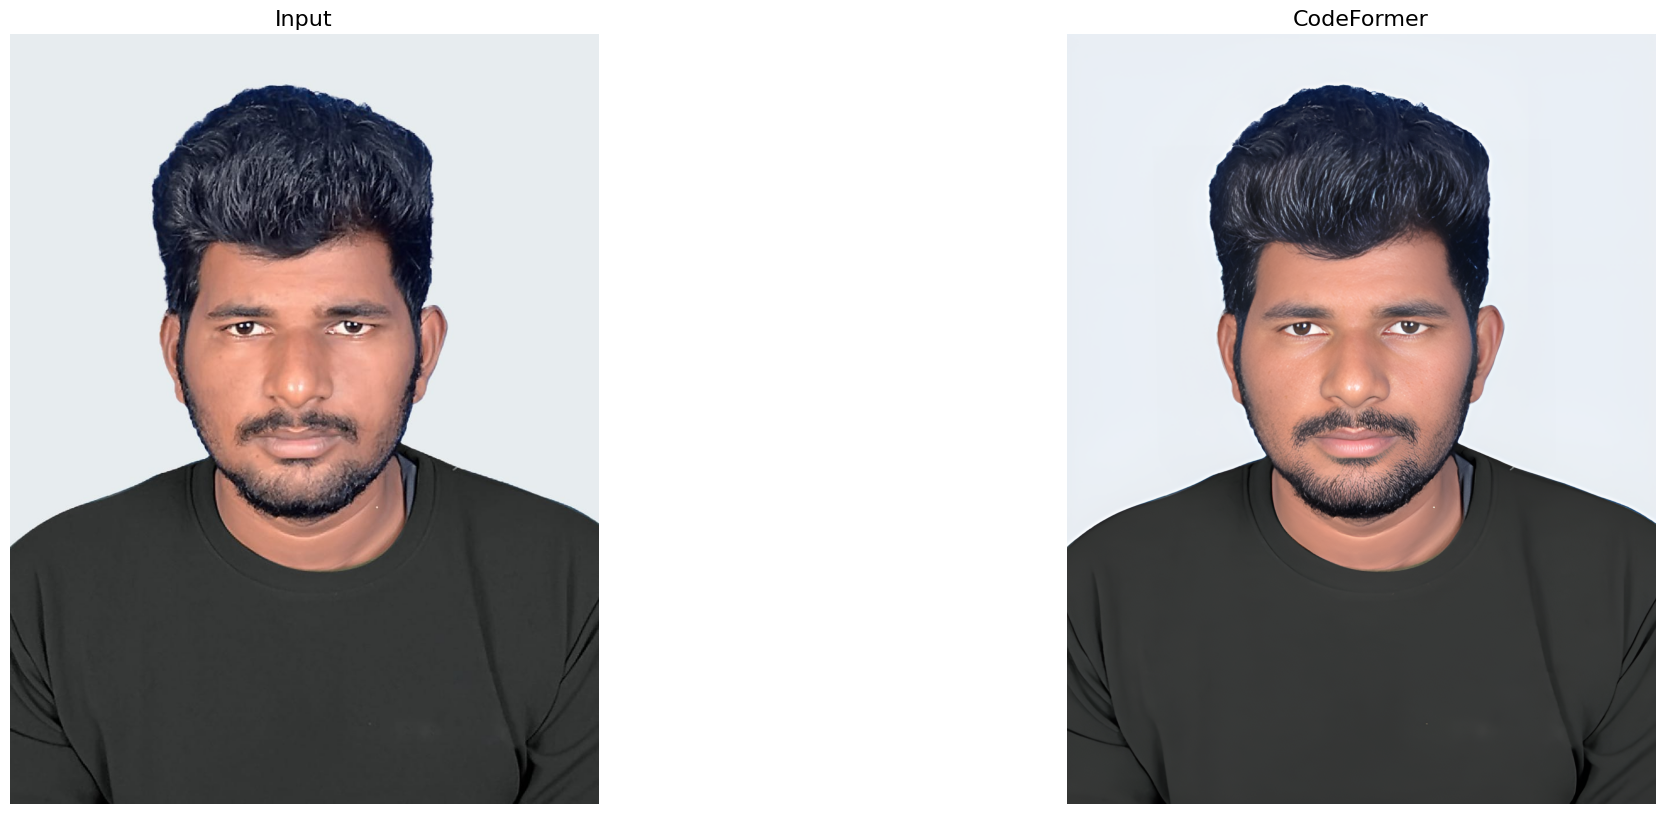

In [5]:
# Required Libraries
import os
import shutil
import cv2
import matplotlib.pyplot as plt
from google.colab import files

# Visualization Function
def display(img1, img2):
    fig = plt.figure(figsize=(25, 10))
    ax1 = fig.add_subplot(1, 2, 1)
    plt.title('Input', fontsize=16)
    ax1.axis('off')
    ax2 = fig.add_subplot(1, 2, 2)
    plt.title('CodeFormer', fontsize=16)
    ax2.axis('off')
    ax1.imshow(img1)
    ax2.imshow(img2)

def imread(img_path):
    img = cv2.imread(img_path)
    if img is None:
        raise FileNotFoundError(f"Image file not found at {img_path}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

# Paths
input_folder = '/content/input'
output_folder = '/content/output_bots'
codeformer_path = '/content/CodeFormer'

# Clean up previous runs
if os.path.isdir(input_folder):
    shutil.rmtree(input_folder)
os.mkdir(input_folder)
if os.path.exists(output_folder):
    shutil.rmtree(output_folder)
os.mkdir(output_folder)

# Image Upload
def image_from_device():
    uploaded = files.upload()
    for filename in uploaded.keys():
        dst_path = os.path.join(input_folder, filename)
        print(f'Move {filename} to {dst_path}')
        shutil.move(filename, dst_path)

# Execute Image Upload
image_from_device()
clear_output()
file_count = len(os.listdir(input_folder))
if file_count >= 1:
    print("Run next cell")
else:
    print("Please upload an image.")

# Inference the uploaded images
os.chdir(codeformer_path)

CODEFORMER_FIDELITY = 0.7
BACKGROUND_ENHANCE = True
FACE_UPSAMPLE = True

# Running the inference and saving outputs in specified output folder
command = f'python inference_codeformer.py -w {CODEFORMER_FIDELITY} --input_path {input_folder} --output_path {output_folder}'
if BACKGROUND_ENHANCE:
    command += ' --bg_upsampler realesrgan'
if FACE_UPSAMPLE:
    command += ' --face_upsample'

os.system(command)

# Debugging information to verify the output
print(f"All results are saved in {output_folder}")
output_files = os.listdir(output_folder)
print(f"Files in output folder: {output_files}")

# Check if output folder contains any images
final_results_folder = os.path.join(output_folder, 'final_results')
if not os.path.exists(final_results_folder):
    raise FileNotFoundError(f"No final_results folder found in {output_folder}")

final_results_files = os.listdir(final_results_folder)
if not final_results_files:
    raise FileNotFoundError(f"No output images found in {final_results_folder}")

# Display Results
input_image_path = os.path.join(input_folder, os.listdir(input_folder)[0])
output_image_path = os.path.join(final_results_folder, final_results_files[0])

print(f"Input image path: {input_image_path}")
print(f"Output image path: {output_image_path}")

input_image = imread(input_image_path)
output_image = imread(output_image_path)
display(input_image, output_image)


# **Integrated codeformer with AI_headshot code**

In [11]:
!git clone https://github.com/girinath18/roop.git

fatal: destination path 'roop' already exists and is not an empty directory.


In [12]:
!pip install pyngrok
from pyngrok import ngrok
ngrok.set_auth_token("2hjWFIAPs7ZxhzRYXHiFIxlNWZw_3PioyKK74DBWp4WazXYiW")
public_url = ngrok.connect(5000).public_url
!git clone https://github.com/girinath18/roop.git
!pip install --upgrade insightface onnxruntime
%cd roop

fatal: destination path 'roop' already exists and is not an empty directory.
/content/CodeFormer/roop/roop/roop


In [ ]:
!pip install flask_ngrok
!pip install pyngrok
!pip install onnxruntime
!pip install customtkinter
!pip install torch torchvision
!pip install flask
!pip install pyngrok --upgrade
!pip install --upgrade pyngrok
!pip install -r /content/CodeFormer/roop/requirements.txt
%cd /content/CodeFormer/roop/roop

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu118
Ignoring tkinterdnd2-universal: markers 'sys_platform == "darwin" and platform_machine == "arm64"' don't match your environment
Ignoring onnxruntime: markers 'python_version != "3.9" and sys_platform == "darwin" and platform_machine != "arm64"' don't match your environment
Ignoring onnxruntime-coreml: markers 'python_version == "3.9" and sys_platform == "darwin" and platform_machine != "arm64"' don't match your environment
Ignoring onnxruntime-silicon: markers 'sys_platform == "darwin" and platform_machine == "arm64"' don't match your environment
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 57.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 84.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.6/295.6 kB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [14]:
%rm -rf /root/.insightface/models/buffalo_l/
!pip install --upgrade insightface onnxruntime

In [ ]:
from flask import Flask, request, jsonify, send_from_directory, url_for
import os
import shutil
import logging
from pyngrok import ngrok
import subprocess
import cv2
import matplotlib.pyplot as plt

app = Flask(__name__)

logging.basicConfig(level=logging.INFO)

TEMPLATES_FOLDER_PATH = "/content/gdrive/MyDrive/template/lINKEDIN/Female"
OUTPUT_BASE_FOLDER = "/content/output_Bot"
PERMANENT_OUTPUT_FOLDER = "/content/output_Bot/RGR(Outputs)"
CODEFORMER_PATH = '/content/CodeFormer'

def display(img1, img2):
    fig = plt.figure(figsize=(25, 10))
    ax1 = fig.add_subplot(1, 2, 1)
    plt.title('Input', fontsize=16)
    ax1.axis('off')
    ax2 = fig.add_subplot(1, 2, 2)
    plt.title('CodeFormer', fontsize=16)
    ax2.axis('off')
    ax1.imshow(img1)
    ax2.imshow(img2)

def imread(img_path):
    img = cv2.imread(img_path)
    if img is None:
        raise FileNotFoundError(f"Image file not found at {img_path}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

def codeformer_process(input_folder, output_folder):
    CODEFORMER_FIDELITY = 0.7
    BACKGROUND_ENHANCE = True
    FACE_UPSAMPLE = True

    command = f'python {os.path.join(CODEFORMER_PATH, "inference_codeformer.py")} -w {CODEFORMER_FIDELITY} --input_path {input_folder} --output_path {output_folder}'
    if BACKGROUND_ENHANCE:
        command += ' --bg_upsampler realesrgan'
    if FACE_UPSAMPLE:
        command += ' --face_upsample'

    os.system(command)

def face_swap(source_image_folder, output_base_folder):
    try:
        output_folder = os.path.join(output_base_folder, "RGR(Outputs)")
        os.makedirs(output_folder, exist_ok=True)
        os.makedirs(PERMANENT_OUTPUT_FOLDER, exist_ok=True)
        logging.info(f"Output folder created at: {output_folder}")

        source_images = os.listdir(source_image_folder)
        if not source_images:
            logging.error("No source images found.")
            return
        logging.info(f"Found {len(source_images)} source images.")

        template_images = os.listdir(TEMPLATES_FOLDER_PATH)
        if not template_images:
            logging.error("No template images found.")
            return
        logging.info(f"Found {len(template_images)} template images.")

        source_image_name = source_images[0]
        source_image_path = os.path.join(source_image_folder, source_image_name)

        if os.path.isfile(source_image_path):
            logging.info(f"Processing source image: {source_image_name}")

            processed_image_paths = set()

            for target_image_name in template_images:
                target_image_path = os.path.join(TEMPLATES_FOLDER_PATH, target_image_name)

                if os.path.isfile(target_image_path):
                    logging.info(f"Processing target image: {target_image_name}")

                    output_image_path = os.path.join(output_folder, f"{source_image_name}_{target_image_name}")
                    permanent_output_image_path = os.path.join(PERMANENT_OUTPUT_FOLDER, f"{source_image_name}_{target_image_name}")

                    if output_image_path in processed_image_paths:
                        logging.info(f"Skipping already processed image: {output_image_path}")
                        continue

                    command = (
                        f'python run.py -s "{source_image_path}" -t "{target_image_path}" '
                        f'-o "{output_image_path}" --keep-fps --execution-threads 14 --many-faces '
                        f'--execution-provider cuda --frame-processor face_swapper face_enhancer '
                        f'--output-video-quality 35 --temp-frame-format jpg --max-memory 46'
                    )
                    logging.info(f"Running command: {command}")

                    process = subprocess.Popen(command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
                    stdout, stderr = process.communicate()
                    if process.returncode != 0:
                        logging.error(f"Failed to process target image: {target_image_name}")
                        logging.error(f"Command output: {stderr.decode('utf-8')}")
                    else:
                        logging.info(f"Successfully processed target image: {target_image_name}")
                        logging.info(f"Command output: {stdout.decode('utf-8')}")

                        # Process with CodeFormer before moving to permanent output folder
                        temp_input_folder = os.path.join(output_base_folder, "temp_input")
                        temp_output_folder = os.path.join(output_base_folder, "temp_output")
                        os.makedirs(temp_input_folder, exist_ok=True)
                        os.makedirs(temp_output_folder, exist_ok=True)

                        shutil.copy(output_image_path, os.path.join(temp_input_folder, os.path.basename(output_image_path)))
                        codeformer_process(temp_input_folder, temp_output_folder)

                        final_results_folder = os.path.join(temp_output_folder, 'final_results')
                        final_results_files = os.listdir(final_results_folder)
                        if not final_results_files:
                            raise FileNotFoundError(f"No output images found in {final_results_folder}")

                        final_output_image_path = os.path.join(final_results_folder, final_results_files[0])
                        shutil.copy(final_output_image_path, permanent_output_image_path)
                        processed_image_paths.add(output_image_path)

                        shutil.rmtree(temp_input_folder)
                        shutil.rmtree(temp_output_folder)

                    if len(processed_image_paths) >= len(template_images):
                        break

    except Exception as e:
        logging.exception(f"An error occurred: {e}")

@app.route('/faceswap', methods=['POST'])
def faceswap_api():
    try:
        source_image_folder = "/content/source_images"
        os.makedirs(source_image_folder, exist_ok=True)

        source_images = request.files.getlist('source_images')
        if not source_images:
            logging.error("No images uploaded.")
            return jsonify({"error": "No images uploaded"}), 400

        for source_image in source_images:
            source_image.save(os.path.join(source_image_folder, source_image.filename))
            logging.info(f"Uploaded image: {source_image.filename}")

        face_swap(source_image_folder, OUTPUT_BASE_FOLDER)

        shutil.rmtree(source_image_folder)

        return jsonify({"message": "Face swap process initiated."}), 200

    except Exception as e:
        logging.exception(f"An error occurred: {e}")
        return jsonify({"error": "An error occurred"}), 500

@app.route('/output_images', methods=['GET'])
def output_images_api():
    try:
        if not os.path.exists(PERMANENT_OUTPUT_FOLDER):
            logging.error("Output folder does not exist.")
            return jsonify({"error": "Output folder does not exist"}), 404

        output_images = os.listdir(PERMANENT_OUTPUT_FOLDER)
        if not output_images:
            logging.info("No output images found.")
            return jsonify({"message": "No output images found."}), 200

        image_urls = [
            url_for('get_output_image', filename=img, _external=True)
            for img in output_images
        ]
        return jsonify({"images": image_urls})

    except Exception as e:
        logging.exception(f"An error occurred: {e}")
        return jsonify({"error": "An error occurred"}), 500

@app.route('/output_images/<path:filename>', methods=['GET'])
def get_output_image(filename):
    try:
        if os.path.exists(os.path.join(PERMANENT_OUTPUT_FOLDER, filename)):
            return send_from_directory(PERMANENT_OUTPUT_FOLDER, filename)
        else:
            return jsonify({"error": "File not found"}), 404
    except Exception as e:
        logging.exception(f"An error occurred: {e}")
        return jsonify({"error": "An error occurred"}), 500

if __name__ == '__main__':
    url = ngrok.connect(5000)
    print(f" * Ngrok tunnel URL: {url}")

    app.run(port=5000)
